In [ ]:
import numpy as np
import collections
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
import datetime
from xgboost import XGBClassifier

In [ ]:
import os
os.listdir()

['.config',
 'Cmpe353.csv.csv',
 'd.png',
 'Example Submission (1).csv',
 'Cmpe353_Submission.csv',
 'submission_cmpe353.csv',
 'bankTestX.csv',
 'bankTrain.csv',
 'sample_data']

In [ ]:
data= pd.read_csv('bankTrain.csv')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,blue-collar,divorced,secondary,no,644,no,yes,cellular,17,nov,220,4,109,4,failure,no
1,52,admin.,married,primary,no,208,yes,no,cellular,17,apr,377,2,-1,0,unknown,no
2,34,technician,married,secondary,no,1641,yes,no,cellular,17,apr,380,1,-1,0,unknown,no
3,57,services,married,secondary,no,1433,no,no,telephone,21,nov,41,1,-1,0,unknown,no
4,57,technician,married,tertiary,no,2887,yes,no,cellular,11,feb,123,1,-1,0,unknown,no


In [ ]:
from sklearn import preprocessing
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = data[column_name].astype('category')

In [ ]:
data2 = pd.get_dummies(data, columns=['job', 'marital'])

In [ ]:
data2.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,secondary,no,644,no,yes,cellular,17,nov,220,4,109,4,failure,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,52,primary,no,208,yes,no,cellular,17,apr,377,2,-1,0,unknown,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,34,secondary,no,1641,yes,no,cellular,17,apr,380,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,57,secondary,no,1433,no,no,telephone,21,nov,41,1,-1,0,unknown,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,57,tertiary,no,2887,yes,no,cellular,11,feb,123,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
data2 = pd.get_dummies(data, columns=['job', 'marital','education', 'default','housing','loan','contact','month','poutcome'])

In [ ]:
data2.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,644,17,220,4,109,4,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,52,208,17,377,2,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,1641,17,380,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,57,1433,21,41,1,-1,0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,57,2887,11,123,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.shape,data2.shape


((10000, 17), (10000, 52))

In [ ]:
#data2.y=data2.y.apply(lambda x: x=='yes')

In [ ]:
data2.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,644,17,220,4,109,4,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,52,208,17,377,2,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,1641,17,380,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,57,1433,21,41,1,-1,0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,57,2887,11,123,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data2.y[110:120]

110     no
111     no
112    yes
113     no
114     no
115     no
116    yes
117     no
118    yes
119     no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

In [ ]:
data2.y.value_counts()

no     8854
yes    1146
Name: y, dtype: int64

In [ ]:
train=data2[:7000]
test= data2[7000:]
train.shape, test.shape

((7000, 52), (3000, 52))

In [ ]:
y_train= train.y 
X_train= train.drop(['y'], axis=1)
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,644,17,220,4,109,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,52,208,17,377,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,1641,17,380,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,57,1433,21,41,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,57,2887,11,123,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train.shape, y_train.shape

((7000, 51), (7000,))

In [ ]:
y_test= test.y 
X_test= test.drop(['y'], axis=1)
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
7000,55,602,7,350,1,98,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7001,51,837,30,41,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7002,55,617,20,529,3,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7003,27,255,12,123,1,182,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7004,29,2,15,65,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test.shape, y_test.shape

((3000, 51), (3000,))

In [ ]:
y_test.value_counts()

no     2649
yes     351
Name: y, dtype: int64

In [ ]:
y_train.value_counts()

no     6205
yes     795
Name: y, dtype: int64

# Building a Classifier

In [ ]:
y_train.dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

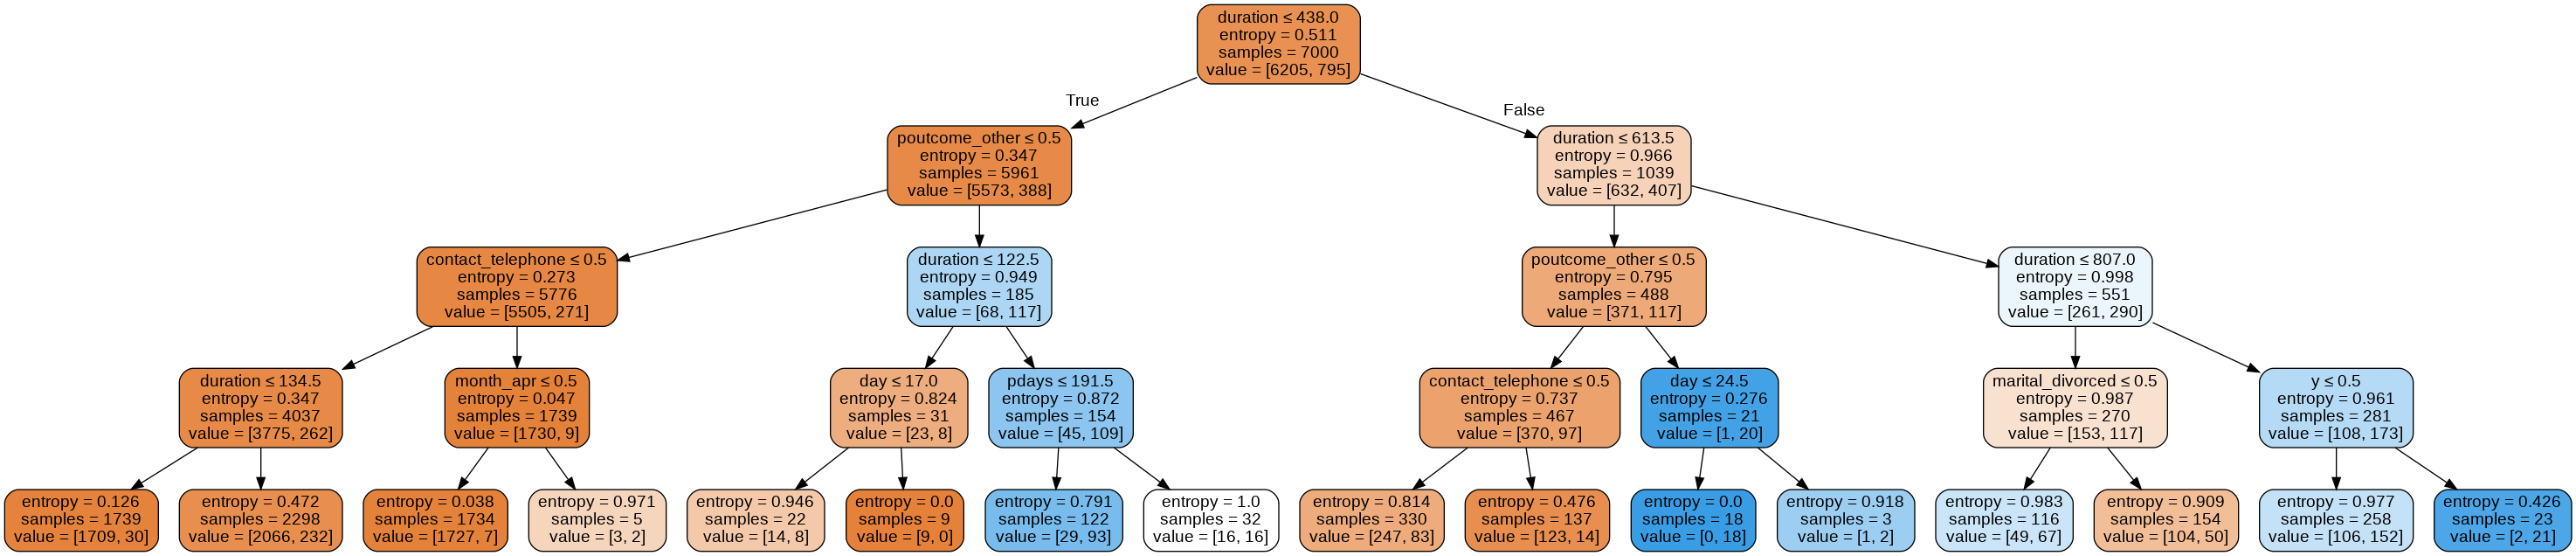

In [ ]:

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(data2.columns[:-1]))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('d.png')
Image(graph.create_png())

## Performance on train data

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_train.iloc[0:1]

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,644,17,220,4,109,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
clf.predict(X_train.iloc[100:101])

array(['no'], dtype=object)

In [ ]:
preds=clf.predict(X_train)

In [ ]:
preds=clf.predict(X_train)
sum(preds==y_train) , len(y_train), sum(preds== y_train) / len(y_train)


(6371, 7000, 0.9101428571428571)

In [ ]:
preds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

## Performance on Test data

In [ ]:

preds=clf.predict(X_test)
sum(preds==y_test) , len(y_test), sum(preds== y_test) / len(y_test)


(2690, 3000, 0.8966666666666666)

# SGD Classifier

In [ ]:
clf=  SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
preds=clf.predict(X_train)
sum(preds==y_train) , len(y_train), sum(preds== y_train) / len(y_train)


(6121, 7000, 0.8744285714285714)

In [ ]:

preds=clf.predict(X_test)
sum(preds==y_test) , len(y_test), sum(preds== y_test) / len(y_test)

(2604, 3000, 0.868)

# RandomForest Classifier

In [ ]:
clf=  RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

preds=clf.predict(X_train)
sum(preds==y_train) , len(y_train), sum(preds== y_train) / len(y_train)

(7000, 7000, 1.0)

In [ ]:
preds=clf.predict(X_test)
sum(preds==y_test) , len(y_test), sum(preds== y_test) / len(y_test)

(2694, 3000, 0.898)

# XGBoost Clasifier

In [ ]:
clf=XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
preds=clf.predict(X_train)
sum(preds==y_train) , len(y_train), sum(preds== y_train) / len(y_train)

(6441, 7000, 0.9201428571428572)

In [ ]:
preds=clf.predict(X_test)
sum(preds==y_test) , len(y_test), sum(preds== y_test) / len(y_test)

(2717, 3000, 0.9056666666666666)

# Load Bank Test X

In [ ]:
df = pd.read_csv("bankTestX.csv")

In [ ]:
df.shape

(2001, 16)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,39,unemployed,single,secondary,no,356,yes,no,unknown,30,may,462,2,-1,0,unknown
1,46,management,single,tertiary,yes,-344,no,no,cellular,8,aug,142,4,-1,0,unknown
2,35,management,single,tertiary,no,560,yes,no,unknown,6,may,181,1,-1,0,unknown
3,27,services,married,secondary,no,0,yes,no,unknown,15,may,312,6,-1,0,unknown
4,56,technician,married,secondary,no,2558,no,no,unknown,19,jun,288,1,-1,0,unknown


In [ ]:
#data.head()

In [ ]:
# load data data from bankTest.csv
# predict the cases
# create one-colum decision table (csv file)
# submit the file to the system


In [ ]:
df = pd.get_dummies(df, columns=['job', 'marital','education', 'default','housing','loan','contact','month','poutcome'])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,39,356,30,462,2,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,46,-344,8,142,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,35,560,6,181,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,27,0,15,312,6,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,56,2558,19,288,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
clf=  RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds=clf.predict(X_train)
sum(preds==y_train) , len(y_train), sum(preds== y_train) / len(y_train)

(7000, 7000, 1.0)

In [ ]:
preds=clf.predict(X_test)
sum(preds==y_test) , len(y_test), sum(preds== y_test) / len(y_test)

(2701, 3000, 0.9003333333333333)

In [ ]:
train=data2[:]
test= df[:]
train.shape, test.shape

((10000, 52), (2001, 51))

In [ ]:
y_train= train.y 
X_train= train.drop(['y'], axis=1)
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,644,17,220,4,109,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,52,208,17,377,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,1641,17,380,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,57,1433,21,41,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,57,2887,11,123,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train.shape, y_train.shape

((10000, 51), (10000,))

In [ ]:
clf=SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
preds=clf.predict(test)

In [ ]:
preds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

In [ ]:
preds2 = clf.predict(test)

In [ ]:
preds2

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

In [ ]:
no_count = 0
yes_count = 0
for elm in preds2:
    if elm == "no":
        no_count += 1
    elif elm == "yes":
        yes_count += 1

In [ ]:
print(no_count,yes_count)

1956 45


In [ ]:
df_csv = pd.DataFrame(preds2)

In [ ]:
df_csv.columns=["y"]

In [ ]:
df_csv

,y
0,no
1,no
2,no
3,no
4,no
...,...
1996,no
1997,yes
1998,no
1999,no


In [ ]:
df_csv.to_csv("submission_cmpe353.csv",index=False)